<img src="https://www.python.org/static/community_logos/python-logo-generic.svg" height="500" width="500"> 

# <center> R для тервера и матстата. <br>  <br> Домашка номер два! </center>

Данный ноутбук является домашкой по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2017-2018). Автор ноутбука [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

----------------------

Приветствую вас внутри второй домашки. По-прежнему, моими героями являетесь вы. Люблю вас. Всем лафки-плюшки. __Краткий брифинг:__

* В тетрадке $6$ задачек. Часть из них решается в пару строк кода, часть потребует написать один цикл. Не надо только пугаться циклов. Это циклы должны пугаться вас.
* Снова некоторые задачи можно решать вручную. Если хочется, можно попробовать. Все решения опубликую после дедлайна.
* Дедлайн: следующая среда (2 мая), утро. 
* Следующая пара снова начнётся с разбора домашки.

Ближе к делу. С чего начинается любой скрипт? Правильно! С подгрузки пакетов :) 

In [1]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

# Внимание! Если вы делаете дз в Rstudio, то вам не нужны пакеты grid, repr и т.п.

### Задачка 1 

Сгенерируйте выборку для случайной величины, которая обладает следующей функцией распределения:


$$
F(x) = \begin{cases} 0, x \le 0 \\ \sin(x), x \in (0, \pi/2] \\ 1, x>\pi/2 \end{cases}
$$

### Задачка 2

Помните? Мы всё это изучаем, чтобы решать реальные проблемы! С помощью генераций в R мы можем оценить любое математическое ожидание и любые вероятности. Нам позволяет сделать это великий и могучий фундаментальный ЗБЧ!

Давайте попробуем проверить несколько свойств математических ожиданий и дисперсий, которые вы доказали на лекциях по теории вероятностей в прошлом семестре. Выберите конкретные случайные величины (любые) и проверьте для них утверждения, перечисленные ниже. 

a) Верно ли, что $E(X + Y) = E(X) + E(Y)$? 

b) Верно ли, что $E(X \cdot Y) = E(X) \cdot E(Y)$?

c) Верно ли, что $Var(X + Y) = Var(X) + Var(Y) + 2 \cdot Cov(X,Y)$? 

d) Верно ли, что $Var(X \cdot Y) = Var(X) \cdot Var(Y)$? 

e) Верно ли, что если $Cov(X, Y) = 0$, то две случайные величины независимы? Удастся ли проверить это с помощью генераций? 

### Задачка 3 

Помните распределение пуассона, экспоненциальное, равномерное и геометрическое? Помните какие там в теории должны быть у этих распределений математические ожидания и дисперсии? А сможете показать с помощью симуляций, что их выборочные дисперсия и среднее сходятся при $n \to \infty$ к теоретическим? Сделайте это для одного из распределений на свой выбор. 

Второй раз в течение тетрадки я пишу "А помните?". Это достойно следующей картинки!

![](https://res.cloudinary.com/teepublic/image/private/s--7w8iwo9Z--/t_Preview/b_rgb:191919,c_lpad,f_jpg,h_630,q_90,w_1200/v1482178539/production/designs/968854_1.jpg)

### Задачка 4 (Распределение Коши) 

Распределение Коши тот ещё фрукт. У стандартного распределения Коши следующая плотность: 

$$
f_X(x) = \frac{1}{\pi(1+x^2)}
$$

Выглядит довольно красиво, но эта красота обманчива. У распределения Коши есть куча проблем. Одна из таких проблем это отсутствие математического ожидания и дисперсии. Закон больших чисел позволяет нам сказать, что для некоторых распределений 

$$ P( \mid \bar x - E(X)\mid \le \varepsilon  ) \to 1, $$

то есть выборочное среднее по вероятности сходится к математическому ожиданию. Как мы знаем, для распределения Коши математического ожидания не существует. Интересно было бы узнать к чему в таком случае сходится выборочное среднее. Для решения вам понадобится функция `rcauchy`.

a) Постройте для распределения Коши точно такую же картинку, какую мы строили на паре для подбрасывания игральной кости. Попытайтесь проинтерпретировать то, что вы увидете. Если не получается, не печальтесь. Когда я печалюсь, я обычно перестаю печалиться и просто становлюсь клёвым. И это правда. Советую вам делать также. 

b) Попробуйте точно также посмотреть к чему сходится выборочная дисперсия. 

У распределения Коши тоже есть разные забавные свойства. Например, если у нас есть две независимые нормально распределённые случайные виличины $X_1 \sim N(0,1)$ и $X_2 \sim N(0,1)$, то случайная величина $Y = \dfrac{X_1}{X_2}$ будет иметь распределение Коши. Если вы хорошо учите математическую статистку, то вы уже догадались, что распределение Стьюдента с одной степенью свободы, $t(1)$ — это ни что иное как распределение Коши. Посмотрите в лекциях чему равно математическое ожидание и дисперсия для распределеняи Стьюдента и попытайтесь соотнести это с тем, что было получено вами выше.

На следующей паре мы будем более подробно говорить про разные сходимости (по вероятности, почти наверное, слабая и тп), а также про распределение Стьюдента. Как бы таинственно это для вас не прозвучало, но оно обладает тяжёлыми хвостами. Поднимем таинсвенность на новый уровень: тяжёлые хвосты способствуют порождению чёрных лебедей. В финансах это вызывает большой скоп проблем. Попробуем успеть поговорить и про это. 

### Задачка 5 (Парадокс дней рождений)

Вы когда-нибудь слышали про парадокс дней рождений? На википедии есть статья. Остановитесь, не нужно её гуглить. Давайте попробуем поразмышлять. Как думаете какова вероятность того, что в комнате, в которой находится $23$ человека, хотябы у двоих из них дни рождения совпадают (не у вас с кем-нибудь совпадёт, а у двоих произвольных людей)? 

__Внимание, ответ:__ вероятность этого $0.5$. Если в комнате $50$ человек, то вероятность этого возрастает до $0.97$. Получается, что если вы находитесь в большой аудитории, то вы смело можете ставить деньги на то, что в ней дни рождения у каких-нибудь двух произвольных людей совпадут. Делая такие ставки довольно часто, вы сможете обогатиться. Конечно же, иногда вы будете проигрывать, но математическое ожидание такой игры будет суперположительным. Например, если вы будете ставить $1000$ рублей, ваш ожидаемый выигрыш составит

$$
E(X) = 0.97\cdot1000 - 0.03\cdot1000.
$$ 

Слабо найти вероятность того, что хотябы у двоих людей из $n$ дни рождения совпадут руками? Если слабо, добро пожаловать на [википедию.](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения)

Почему нам трудно в это поверить? Ответ математический: степени трудно осознать. Как визирь в [древней задаче про шахматы и зёрнышки,](https://ru.wikipedia.org/wiki/Задача_о_зёрнах_на_шахматной_доске) мы плохо понимаем степенную функцию. Даже если мы подучились математике и статистике, это всё равно как-то непривычно. Вот пример неправильной логики: какова вероятность выпадения $10$ решек подряд?

Нетренированный мозг может составить примерно такую цепочку мыслей: одна решка - $50%$, две решки - $25%$. Значит десяток решек в $10$ раз труднее, ну то есть $5%$. Ну вот мы и облажались. Реальный шанс это $0.5^{10}$. Ошиблись немного. Примерно в $50$ раз.

Итак, в произвольной группе из $50$ человек вероятность того, что хотябы у двоих людей дни рождения совпадут равна $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической. 

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. В табличке `vk_bdates.csv` лежит информация о $4589300$ пользователей из вконтакте. В табличке можно найти данные о имени пользователя `first_name`, его поле `sex`, его родном городе `home_town`, городе проживания `city`, дне `bdate`, месяце `bmonth` и годе `byear` рождения. Также там лежит информация о том удалена ли его страничка `deactivated`. 

Попробуйте на основе данных из этой таблички проверить парадокс дней рождений. Проверять его мы будем, конечно же в R. От вас требуется: 

1. Удалить из таблички всех людей, чьи страницы были забанены или удалены.
2. Удалить из таблички всех людей, для которых недоступны день и месяц рождения.
3. Постройте гистограмму, на которой было бы понятно в какой месяц родилось какое количество людей. Команда для этого приведена ниже. Как считате помесячная рождаемость имеет равномерное распределение?
4. Постройте точно такую же гистограмму для дней рождений. Вас ждёт небольшой сюрприз. Избавьтесь от этого сюрприза, чтобы он не замусоривал данные. Как считатет, подневная рождаемость имеет равномерное распределение? 
5. Постройте заключительную гистограмму для сочетания колонок `bmonth` и `bday`, чтобы понять как дни рождения распределны в течение года. 
6. Предпоследнее! Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдётся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички с помощью команды `sample` будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла. 
7. Попробуйте проделать ту же оценку отдельно для подмножества женщин и подмножества мужчин. Насколько оценки вероятностей разнятся? 

In [26]:
df = read.csv('data/vk_bdates.csv', sep='\t', dec='.')

dim(df)
head(df)

[1] 4589300      11

X,city,deactivated,first_name,home_town,id,last_name,sex,byear,bmonth,bday
0,Москва,,Илья,,5,Перекопский,2,NA,11,18
1,Санкт-Петербург,,Николай,,6,Дуров,2,NA,NA,NA
2,Санкт-Петербург,,Михаил,Санкт-Петербург,11,Петров,2,NA,12,18
3,Санкт-Петербург,,Татьяна,,34,Плуталова,1,NA,NA,NA
4,,banned,Габриел,,47,Шалел,2,NA,NA,NA
5,,,Сергей,,57,Владимиров,2,NA,NA,NA


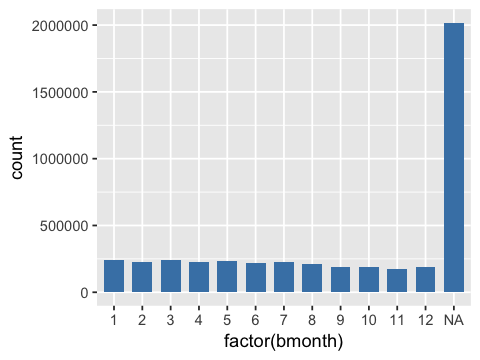

In [27]:
# Когда будете строить такой график, избавьтесь от колонки NA
# Это позволяет сделать грамотное выполнение 1 и 2 пунктов инструкции :) 
ggplot(df, aes(x=factor(bmonth)))+
  geom_bar(stat="count", width=0.7, fill="steelblue")

На самом деле мы с вами только что впервые попробовали вскрыть внутренности сундука, о котором мы говорили на прошлой паре, по итоговой выборке. Закон больших чисел в форме Бернулли (помните из лекций по терверу?) позволил нам оценить вероятность события на основе его частоты. Очень круто, когда математика разрешает тебе сделать что-нибудь клёвое. 

### Задачка 6 (Киллер) 

Почти все пункты данной задачи можно попытаться решить руками. Это вполне себе реально.

Эконом играет в киллера! Всего участие в игре принимает $100$ человек. Краткие правила игры: 

1. Каждый игрок одновременно и убийца и жертва. 
2. Игроку даётся конверт, в котором лежит имя человека, которого он должен убить. 
3. Сам игрок также находится у кого-то в конверте. Нужно не допустить своей смерти. 
4. Чтобы убить другого игрока, надо оказаться с ним наедине и застрелить из пальца. 
5. Жертва убитого становится новой жертвой игрока. 
6. Побеждает тот, кто совершит наибольшее число убийств. 

Организаторы игры сразу же столкнулись с несколькими проблемами. Первая проблема это __суицидники.__ Если Максиму в конверте попался Максим, то Максим должен убить сам себя. Он - суицидник.  В такой ситуации организаторам придётся поменять конверт. Хотелось бы, чтобы подобных ситуаций было как можно меньше.

a) Оцените с помощью симуляций вероятность того, что хотя бы один человек получит в конверте сам себя. Какова вероятность того, что суицидником окажется именно Максим? 

b) Пусть случайная величина $X$ - количество суицидников. Оцените $E(X)$ с помощью симуляций. Проинтерпретируйте величину $E(X)$. Что она означает для организаторов игры? 

Вторая проблема это __мэтчинги__. Если у Глеба в конверте оказалась Аня, а у Ани в конверте оказался Глеб, то между ними возник мэтчинг. Когда игроки останутся наедине, они попробуют убить друг-друга, и у них ничего не выйдет. Организатором придётся заменить Ане и Глебу конверты с жертвами. 

c) Оцените вероятность того, что в раздаче возник хотя бы один мэтчинг. Какова вероятность того, что мэтчинг возникнет именно между Аней и Глебом? 

d) Пусть случайная величина $Y$ - количество мэтчингов. Оцените $E(Y)$. Проинтерпретируйте величину $E(Y)$. Что она означает для организаторов?

e) Кроме мэтчингов в игре существуют __цепи.__  Например, у Ахмеда в конверте могла оказаться Рита, у Риты Максим, а у Максима Ахмед. Игроки выстраиваются в цепь. После того как Рита убьёт Максима, а затем Ахмеда, цепь замкнётся и у Риты окажется она же сама. Ответьте устно на вопрос: какова вероятность того, что в игре ни один игрок в ходе разрыва такой цепи не окажется сам у себя. 

Пусть случайная величина $Z$ - количество цепей в игре. Оцените $E(Z)$. Что эта величина означает для организаторов? Проинтерпретируйе её.  

f) Пусть случайная величина $Scriptonit$ - длина цепи, возникшей в игре. Оцените с помощью симуляций среднюю длину цепей, то есть $E(Scriptonit)$.

Эх! Организаторы столкнуться с довольно большим числом сложностей. На основе всего того анализа, который вы провели выше, дайте им пару советов: о чём стоит беспокоиться, а о чём нет. Также подумайте о том, что ещё следует проверить. 